<a href="https://colab.research.google.com/github/embarced/notebooks/blob/master/mlops/generate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generating Sample Data from Distributions
Then treating data as if they were samples of real data

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pandas as pd
print(pd.__version__)

1.1.5


# Plot randomly generated classification dataset

http://scikit-learn.org/stable/auto_examples/datasets/plot_random_dataset.html

http://scikit-learn.org/stable/datasets/index.html#sample-generators

http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

Plot several randomly generated 2D classification datasets.
This example illustrates the :func:`datasets.make_classification`
:func:`datasets.make_blobs` and :func:`datasets.make_gaussian_quantiles`
functions.

For ``make_classification``, three binary and two multi-class classification
datasets are generated, with different numbers of informative features and
clusters per class.  


In [4]:
import numpy as np

from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs

# N_SAMPLES = 500
N_SAMPLES = 1500

TRAIN_SEED = 42
TEST_SEED = 13

# change seed for test data set
SEED = TRAIN_SEED
# SEED = TEST_SEED

# http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs

# https://www.welt.de/motor/news/article156991316/Unfallstatistik-2015.html
# http://www.openculture.com/2017/12/why-incompetent-people-think-theyre-amazing.html
# 0: young drivers with fast cars: red
# 1: a little bit older, more kilometers, general noise: yellow
# 2: reasonable drivers: green
# 3: really old drivers: red
# 4: young drivers: red
# 5: another green just to have a counter part to all the red ones: green
# 6: people who do not drive a lot: green
# 7: people who drive a lot: yellow
# 8: young people with slow cars: yellow

centers = [(150, 35, 50), (120, 55, 30), (110, 50, 25), (120, 75, 20), (120, 30, 30), 
           (140, 45, 40), (110, 40, 15), (130, 50, 45), (100, 25, 15)]
cluster_std = [4, 18, 9, 8, 9, 5, 8, 12, 5]

# X, y = make_blobs(n_samples=300, n_features=3, centers=centers, random_state=13, cluster_std = cluster_std)
# X, y = make_blobs(n_samples=300, n_features=3, centers=centers, random_state=42, cluster_std = cluster_std)
X, y = make_blobs(n_samples=N_SAMPLES, n_features=3, centers=centers, random_state=SEED, cluster_std = cluster_std)

# http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html
# X, y = make_classification(n_features=3, n_redundant=0, n_informative=3,
#                              n_clusters_per_class=2, n_classes=3, random_state=42)

feature_names = ['speed', 'age' ,'miles']
df = pd.DataFrame(X, columns=feature_names)
df = df.round()
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.clip.html

df['speed'] = df['speed'].clip(60,200)
df['age'] = df['age'].clip(16,100)
df['miles'] = df['miles'].clip(1,500)

GREEN = 2
YELLOW = 1
RED = 0

# merges clusters into one group
for group in np.nditer(y, op_flags=['readwrite']):
    if group == 3 or group == 4:
        group[...] = RED
    if group == 5 or group == 6:
        group[...] = GREEN
    if group == 7 or group == 8:
        group[...] = YELLOW

In [5]:
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([501, 499, 500]))

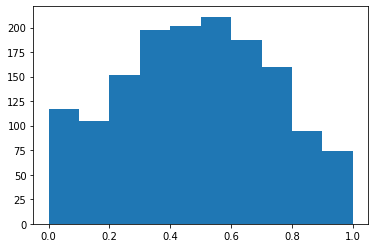

In [6]:

def group_to_proba(group):
  if group == RED:
    return 0.7 + np.random.normal(0, 0.20)
  if group == GREEN:
    return 0.3 + np.random.normal(0, 0.20)
  if group == YELLOW:
    return 0.5 + np.random.normal(0, 0.20)

y_proba = [group_to_proba(group) for group in y]
y_proba = np.clip(y_proba, 0 , 1)
plt.hist(y_proba);

In [7]:
df['group'] = y

In [8]:
df['risk'] = y_proba

In [9]:
df.describe()

,speed,age,miles,group,risk
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,122.323333,44.989333,30.384000,0.999333,0.485390
std,17.417147,17.145297,15.214166,0.817177,0.250997
min,80.000000,16.000000,1.000000,0.000000,0.000000
25%,108.000000,32.000000,18.000000,0.000000,0.301678
50%,120.000000,42.000000,29.000000,1.000000,0.493116
75%,137.000000,54.000000,42.000000,2.000000,0.674705
max,166.000000,100.000000,84.000000,2.000000,1.000000


In [10]:
df.head(10)

,speed,age,miles,group,risk
0,97.0,44.0,30.0,1,0.265057
1,135.0,63.0,29.0,1,0.652927
2,111.0,26.0,34.0,0,0.804902
3,97.0,25.0,10.0,1,0.115634
4,114.0,38.0,22.0,2,0.369697
5,130.0,55.0,34.0,0,0.709204
6,118.0,40.0,51.0,0,0.471994
7,143.0,42.0,34.0,2,0.071760
8,110.0,43.0,31.0,2,0.398654
9,148.0,33.0,53.0,0,0.346012


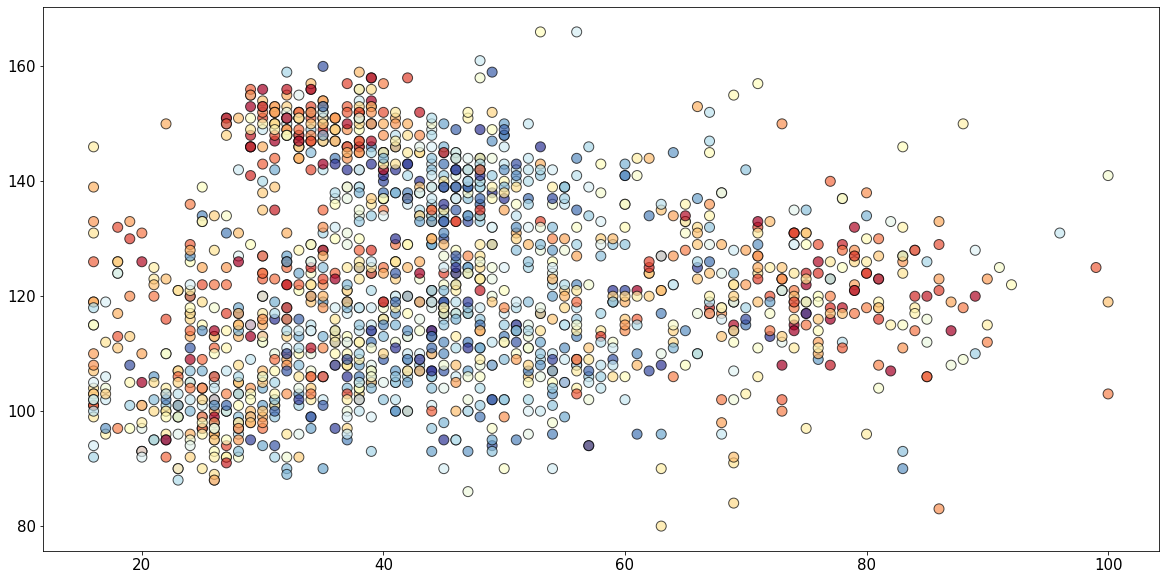

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15, 8)
# mpl.rcParams["figure.dpi"] = dpi
mpl.rc('xtick', labelsize=15) 
mpl.rc('ytick', labelsize=15)

plt.figure(figsize=(20, 10))

plt.scatter(
    df['age'], 
    df['speed'],
    # label=label,
    c=1-df['risk'],
    # marker=marker,
    # https://matplotlib.org/stable/tutorials/colors/colormaps.html
    # cmap='RdYlGn',
    cmap='RdYlBu',
    s=100,
    edgecolors='k',
    alpha=0.7);


In [12]:
import seaborn as sns
sns.__version__

'0.11.1'

In [13]:
vars = ['speed', 'age', 'miles']

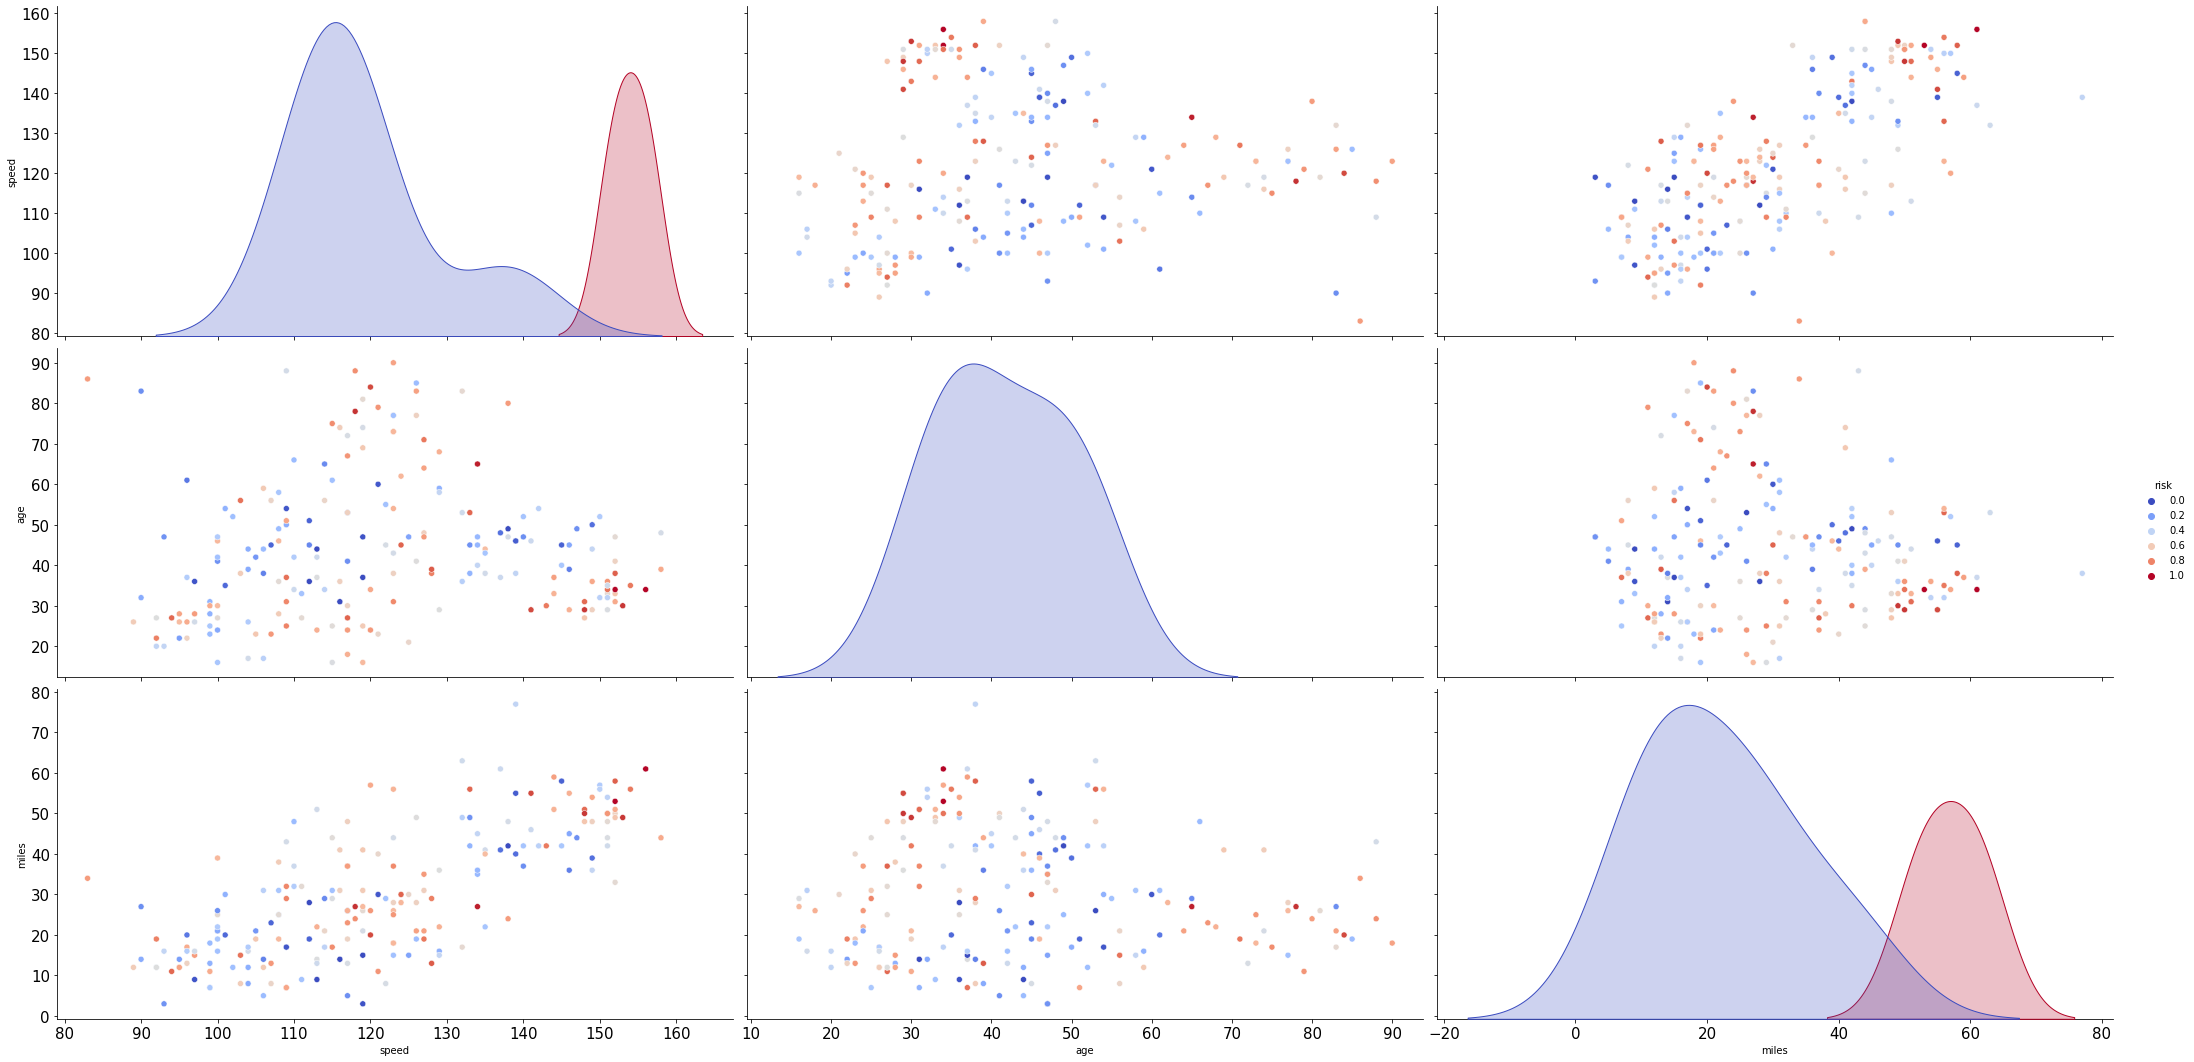

In [14]:
sample_df = df.sample(n=200, random_state=42)
sns.pairplot(sample_df, hue="risk", kind="scatter", diag_kind="kde", height=5, aspect=2, vars=vars, palette="coolwarm");

In [15]:
df.head()

,speed,age,miles,group,risk
0,97.0,44.0,30.0,1,0.265057
1,135.0,63.0,29.0,1,0.652927
2,111.0,26.0,34.0,0,0.804902
3,97.0,25.0,10.0,1,0.115634
4,114.0,38.0,22.0,2,0.369697


In [16]:
df.describe()

,speed,age,miles,group,risk
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,122.323333,44.989333,30.384000,0.999333,0.485390
std,17.417147,17.145297,15.214166,0.817177,0.250997
min,80.000000,16.000000,1.000000,0.000000,0.000000
25%,108.000000,32.000000,18.000000,0.000000,0.301678
50%,120.000000,42.000000,29.000000,1.000000,0.493116
75%,137.000000,54.000000,42.000000,2.000000,0.674705
max,166.000000,100.000000,84.000000,2.000000,1.000000


In [17]:
file_name = './insurance-customers-risk-1500.csv'

In [18]:
df.to_csv(file_name, sep=';', index=False)

In [19]:
!ls -l

total 172
-rw-r--r-- 1 root root 54483 Jul 13 08:27 insurance-customers-risk-1500.csv
-rw-r--r-- 1 root root 54400 Jul 13 08:26 insurance-customers-risk-1500-shift.csv
-rw-r--r-- 1 root root 54544 Jul 13 08:26 insurance-customers-risk-1500-test.csv
drwxr-xr-x 1 root root  4096 Jul  1 13:42 sample_data


In [20]:
# check
# !curl -O https://raw.githubusercontent.com/embarced/notebooks/master/mlops/insurance-customers-risk-1500.csv

In [21]:
!ls -l

total 172
-rw-r--r-- 1 root root 54483 Jul 13 08:27 insurance-customers-risk-1500.csv
-rw-r--r-- 1 root root 54400 Jul 13 08:26 insurance-customers-risk-1500-shift.csv
-rw-r--r-- 1 root root 54544 Jul 13 08:26 insurance-customers-risk-1500-test.csv
drwxr-xr-x 1 root root  4096 Jul  1 13:42 sample_data


In [22]:
customers = pd.read_csv(file_name, sep=';')

In [23]:
customers.describe()

,speed,age,miles,group,risk
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,122.323333,44.989333,30.384000,0.999333,0.485390
std,17.417147,17.145297,15.214166,0.817177,0.250997
min,80.000000,16.000000,1.000000,0.000000,0.000000
25%,108.000000,32.000000,18.000000,0.000000,0.301678
50%,120.000000,42.000000,29.000000,1.000000,0.493116
75%,137.000000,54.000000,42.000000,2.000000,0.674705
max,166.000000,100.000000,84.000000,2.000000,1.000000


### Test data
* use different seed

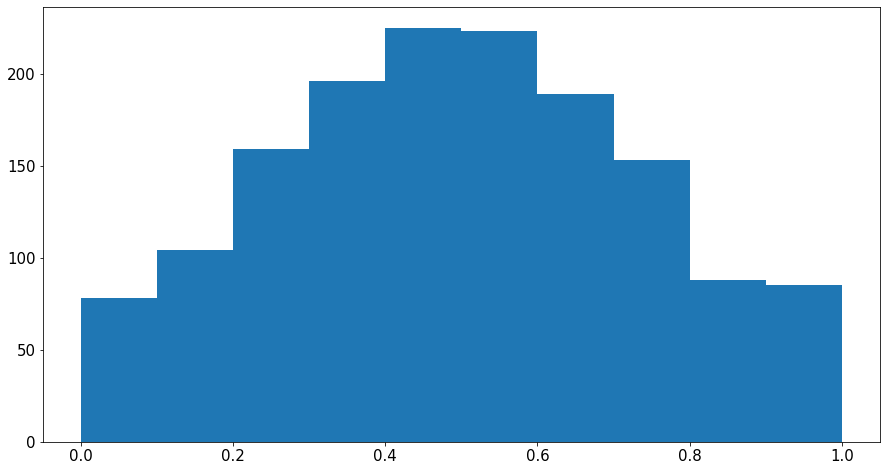

In [24]:
N_SAMPLES = 1500

TRAIN_SEED = 42
TEST_SEED = 13

# change seed for test data set
# SEED = TRAIN_SEED
SEED = TEST_SEED

# http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs

# https://www.welt.de/motor/news/article156991316/Unfallstatistik-2015.html
# http://www.openculture.com/2017/12/why-incompetent-people-think-theyre-amazing.html
# 0: young drivers with fast cars: red

young_fast_center = (150, 35, 50)
young_fast_std = 4

# 1: a little bit older, more kilometers, general noise: yellow
# 2: reasonable drivers: green

reasonable_center = (110, 50, 25)
reasonable_std = 9

# 3: really old drivers: red

old = 3

old_center = (120, 75, 20)
old_std = 8

# 4: young drivers: red

young = old + 1

young_center = (120, 30, 30)
young_std = 9

# 5: another green just to have a counter part to all the red ones: green

green_counter = young + 1

# 6: people who do not drive a lot: green

few_miles = green_counter + 1

# 7: people who drive a lot: yellow

many_miles = few_miles + 1

# 8: young people with slow cars: yellow

yound_slow = many_miles + 1

young_slow_center = (100, 25, 15)
young_slow_std = 5


centers = [young_fast_center, (120, 55, 30), reasonable_center, old_center, 
           young_center, 
           (140, 45, 40), (110, 40, 15), (130, 50, 45), young_slow_center]
cluster_std = [young_fast_std, 18, reasonable_std, old_std, 
               young_std, 
               5, 8, 12, young_slow_std]

# X, y = make_blobs(n_samples=300, n_features=3, centers=centers, random_state=13, cluster_std = cluster_std)
# X, y = make_blobs(n_samples=300, n_features=3, centers=centers, random_state=42, cluster_std = cluster_std)
X, y = make_blobs(n_samples=N_SAMPLES, n_features=3, centers=centers, random_state=SEED, cluster_std = cluster_std)

# http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html
# X, y = make_classification(n_features=3, n_redundant=0, n_informative=3,
#                              n_clusters_per_class=2, n_classes=3, random_state=42)

feature_names = ['speed', 'age' ,'miles']
df = pd.DataFrame(X, columns=feature_names)
df = df.round()
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.clip.html

df['speed'] = df['speed'].clip(60,200)
df['age'] = df['age'].clip(16,100)
df['miles'] = df['miles'].clip(1,500)

# merges clusters into one group
for group in np.nditer(y, op_flags=['readwrite']):
    if group == old or group == young:
        group[...] = RED
    if group == green_counter or group == few_miles:
        group[...] = GREEN
    if group == yound_slow or group == many_miles:
        group[...] = YELLOW

def group_to_proba(group):
  if group == RED:
    return 0.7 + np.random.normal(0, 0.20)
  if group == GREEN:
    return 0.3 + np.random.normal(0, 0.20)
  if group == YELLOW:
    return 0.5 + np.random.normal(0, 0.20)

y_proba = [group_to_proba(group) for group in y]
y_proba = np.clip(y_proba, 0 , 1)

df['group'] = y
df['risk'] = y_proba

plt.hist(y_proba);

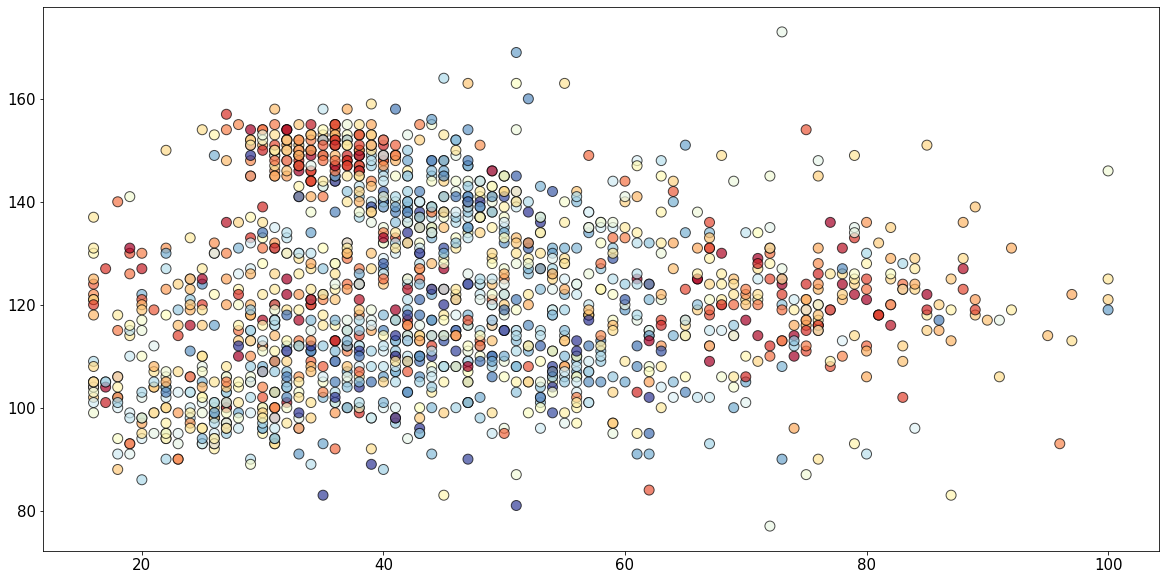

In [25]:
plt.figure(figsize=(20, 10))

plt.scatter(
    df['age'], 
    df['speed'],
    # label=label,
    c=1-df['risk'],
    # marker=marker,
    # https://matplotlib.org/stable/tutorials/colors/colormaps.html
    # cmap='RdYlGn',
    cmap='RdYlBu',
    s=100,
    edgecolors='k',
    alpha=0.7);


In [26]:
file_name = './insurance-customers-risk-1500-test.csv'
# file_name = './insurance-customers-risk-1500-shift.csv'

In [27]:
df.to_csv(file_name, sep=';', index=False)

### General shift in the distribution clearly towards the better 
* use different seed
* block of young bad drivers is simply erased
* big block of reasonable drivers gets more spread out, because everyone drives more due to corona
* all bad drivers get better because cars have many support systems now
  * spread out blobs
  * more shift towards extremes

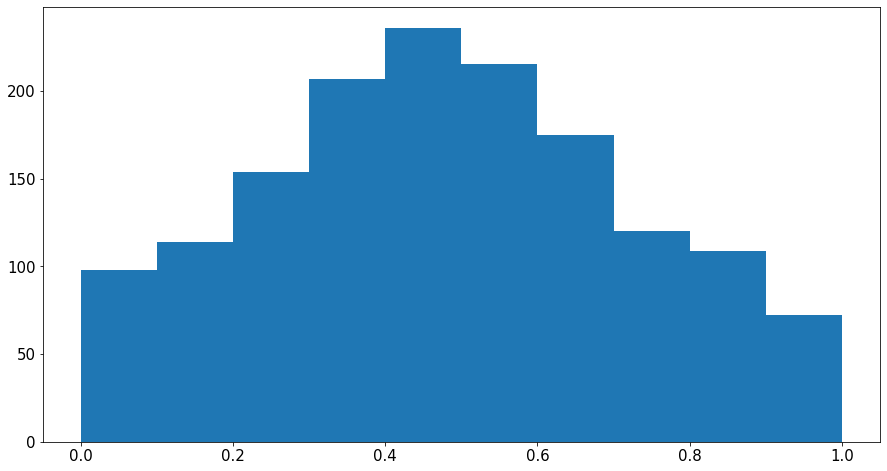

In [28]:
N_SAMPLES = 1500

TRAIN_SEED = 42
TEST_SEED = 13

# change seed for test data set
# SEED = TRAIN_SEED
SEED = TEST_SEED

# http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs

# https://www.welt.de/motor/news/article156991316/Unfallstatistik-2015.html
# http://www.openculture.com/2017/12/why-incompetent-people-think-theyre-amazing.html
# 0: young drivers with fast cars: red

young_fast_center = (160, 30, 50)

# young_fast_center = (150, 35, 50)
# young_fast_std = 4
young_fast_std = 6

# 1: a little bit older, more kilometers, general noise: yellow

# 2: reasonable drivers: green

reasonable_center = (110, 50, 25)
# reasonable_std = 9
reasonable_std = 11

# 3: really old drivers: red

old = 3

# old_center = (120, 75, 20)
old_center = (120, 80, 20)
# old_std = 8
old_std = 9

# 4: young drivers: red

# young = old + 1
young = old

# young_center = (120, 30, 30)
# young_std = 9

young_center = (120, 30, 30)
young_std = 9

# 5: another green just to have a counter part to all the red ones: green

green_counter = young + 1

# 6: people who do not drive a lot: green

few_miles = green_counter + 1

# 7: people who drive a lot: yellow

many_miles = few_miles + 1

# 8: young people with slow cars: yellow

yound_slow = many_miles + 1

# young_slow_center = (100, 25, 15)
young_slow_center = (100, 20, 15)
young_slow_std = 3


centers = [young_fast_center, (120, 55, 30), reasonable_center, old_center, 
          #  young_center, 
           (140, 45, 40), (110, 40, 15), (130, 50, 45), young_slow_center]
cluster_std = [young_fast_std, 18, reasonable_std, old_std, 
              #  young_std, 
               5, 8, 12, young_slow_std]

# X, y = make_blobs(n_samples=300, n_features=3, centers=centers, random_state=13, cluster_std = cluster_std)
# X, y = make_blobs(n_samples=300, n_features=3, centers=centers, random_state=42, cluster_std = cluster_std)
X, y = make_blobs(n_samples=N_SAMPLES, n_features=3, centers=centers, random_state=SEED, cluster_std = cluster_std)

# http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html
# X, y = make_classification(n_features=3, n_redundant=0, n_informative=3,
#                              n_clusters_per_class=2, n_classes=3, random_state=42)

feature_names = ['speed', 'age' ,'miles']
df = pd.DataFrame(X, columns=feature_names)
df = df.round()
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.clip.html

df['speed'] = df['speed'].clip(60,200)
df['age'] = df['age'].clip(16,100)
df['miles'] = df['miles'].clip(1,500)

# merges clusters into one group
for group in np.nditer(y, op_flags=['readwrite']):
    if group == old or group == young:
        group[...] = RED
    if group == green_counter or group == few_miles:
        group[...] = GREEN
    if group == yound_slow or group == many_miles:
        group[...] = YELLOW

def group_to_proba(group):
  if group == RED:
    return 0.7 + np.random.normal(0, 0.20)
  if group == GREEN:
    return 0.3 + np.random.normal(0, 0.20)
  if group == YELLOW:
    return 0.5 + np.random.normal(0, 0.20)

y_proba = [group_to_proba(group) for group in y]
y_proba = np.clip(y_proba, 0 , 1)

df['group'] = y
df['risk'] = y_proba

plt.hist(y_proba);

In [29]:
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([376, 562, 562]))

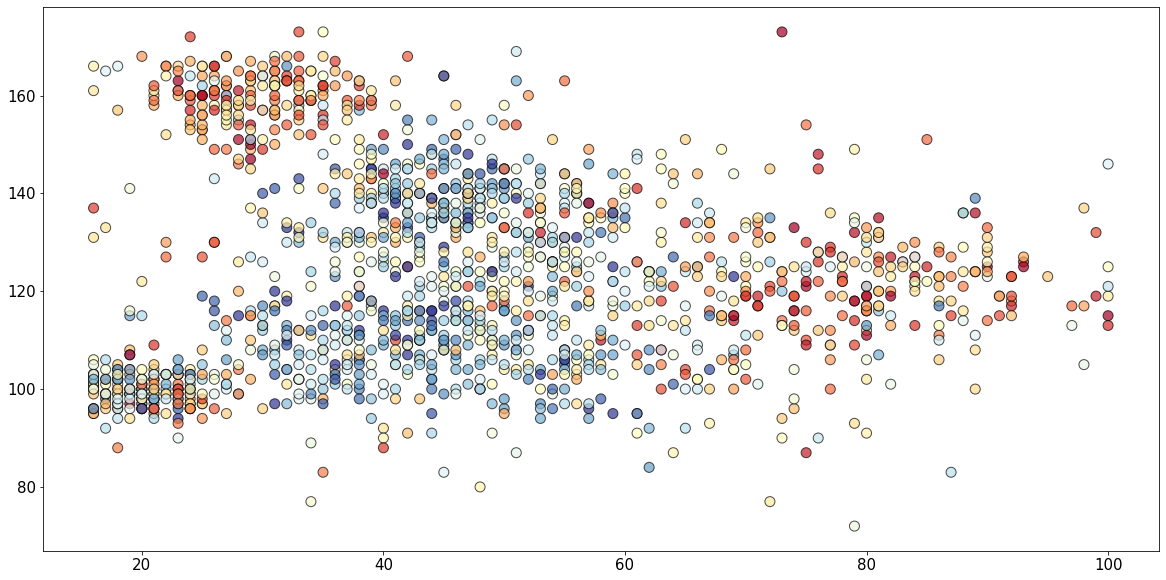

In [30]:
plt.figure(figsize=(20, 10))

plt.scatter(
    df['age'], 
    df['speed'],
    # label=label,
    c=1-df['risk'],
    # marker=marker,
    # https://matplotlib.org/stable/tutorials/colors/colormaps.html
    # cmap='RdYlGn',
    cmap='RdYlBu',
    s=100,
    edgecolors='k',
    alpha=0.7);


In [31]:
# file_name = './insurance-customers-risk-1500-test.csv'
file_name = './insurance-customers-risk-1500-shift.csv'

In [32]:
df.to_csv(file_name, sep=';', index=False)

In [33]:
!ls -l

total 172
-rw-r--r-- 1 root root 54483 Jul 13 08:27 insurance-customers-risk-1500.csv
-rw-r--r-- 1 root root 54605 Jul 13 08:27 insurance-customers-risk-1500-shift.csv
-rw-r--r-- 1 root root 54651 Jul 13 08:27 insurance-customers-risk-1500-test.csv
drwxr-xr-x 1 root root  4096 Jul  1 13:42 sample_data
